In [1]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

* Define class of knn

In [2]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self,X):
        predictions = [self._predict(x) for x in X]
        return predictions
    
    def _predict(self,x):
        distances = [self.euclidean_distance(x,x_train) for x_train in self.X_train]
        k_indices=np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        labels, counts = np.unique(k_nearest_labels, return_counts=True)
        most_common_label = labels[np.argmax(counts)]
        return most_common_label

* Define Function Accuracy 

In [3]:
def accuracy(y_true, y_pred):
     correct = 0
     for true_label, pred_label in zip(y_true, y_pred):
        if true_label == pred_label:
            correct += 1
     return correct / len(y_true)

* Load the data

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Data analysis

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

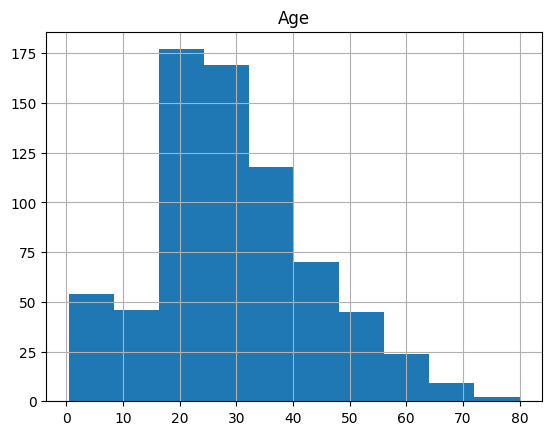

In [6]:
train.hist('Age')

<Axes: xlabel='Embarked'>

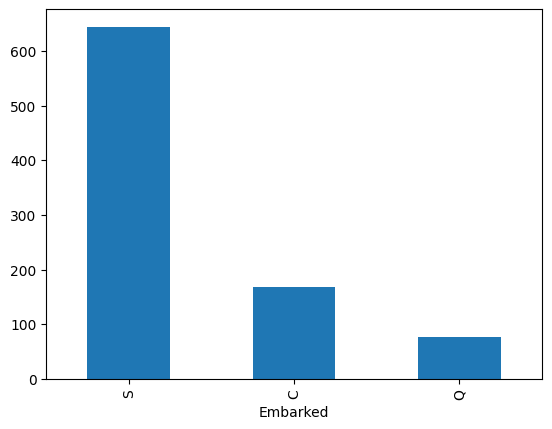

In [7]:
V = train['Embarked'].value_counts()
V.plot.bar()

array([[<Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>],
       [<Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='SibSp', ylabel='Pclass'>,
        <Axes: xlabel='Parch', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>],
       [<Axes: xlabel='Survived', ylabel='Age'>,
        <Axes: xlabel='Pclass', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='SibSp', ylabel='Age'>,
        <Axes: xlabel='Parch', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>],
       [<Axes: xlabel='Survived', ylabel='SibSp'>,
        <Axes: xlabel='Pclass', ylabel='SibSp'>,
        <Axes: xla

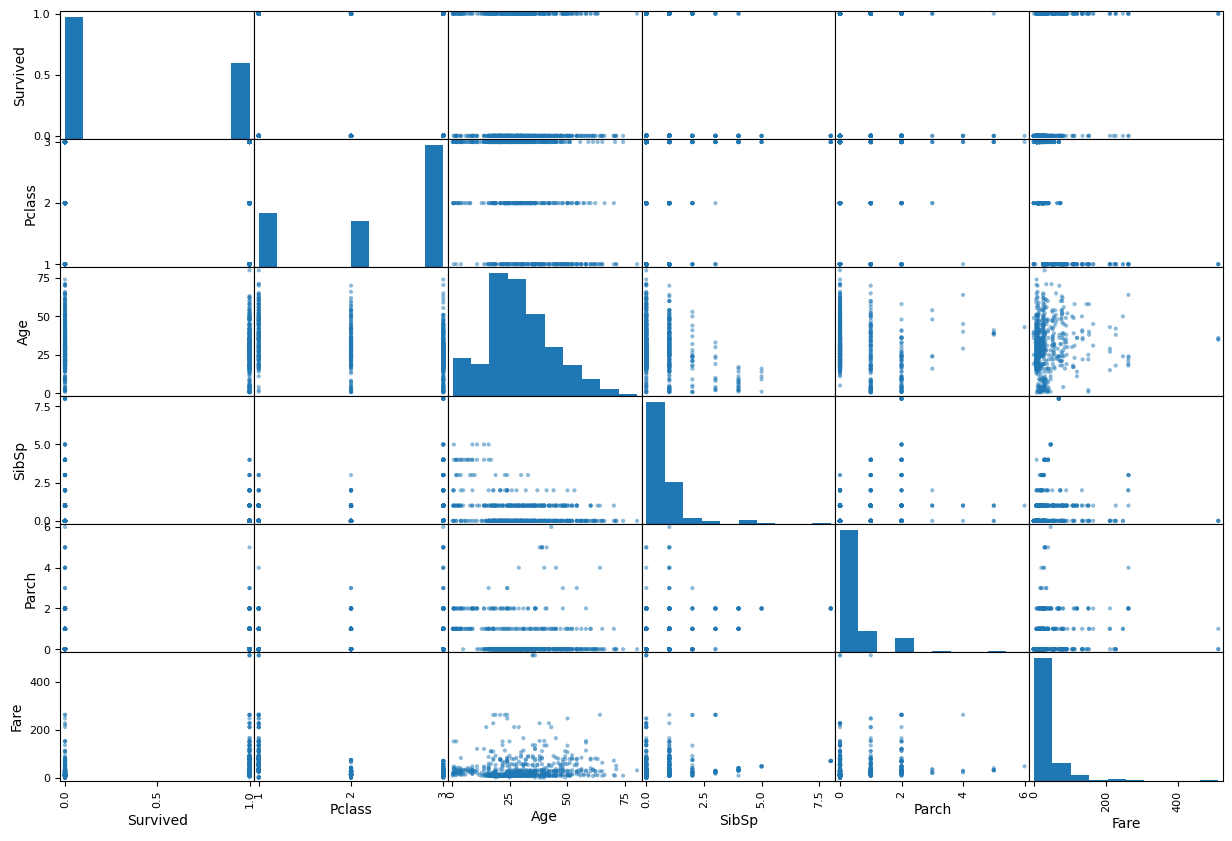

In [8]:
co = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']
pd.plotting.scatter_matrix(train[co],figsize =(15,10),marker='.')

* Data pre-processing

* Drop irrelevant columns

In [9]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [10]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

* check whether any nan values or not

In [11]:
# for train
train.columns[train.isna().any()]

Index(['Age', 'Embarked'], dtype='object')

* Handle missing values

In [12]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [13]:
# for test
test.columns[test.isna().any()]

Index(['Age', 'Fare'], dtype='object')

In [14]:
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

* Convert categorical features to numerical

In [15]:
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})
train['Embarked'] = train['Embarked'].map({'S': 0, 'Q': 1,'C':2})
test['Embarked'] = test['Embarked'].map({'S': 0, 'Q': 1,'C':2})

In [16]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,2.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


In [17]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


* Training the model

* Split into features and target

In [18]:
y_train = train.Survived
x_train = train.drop(['Survived','Embarked'],axis=1)
test = test.drop('Embarked',axis=1)

In [19]:
y_test = pd.read_csv("gender_submission.csv")

In [20]:
y_test = y_test.drop(['PassengerId'],axis=1)

* Create and train the KNN classifier

In [21]:
knn = KNN(k=5)
knn.fit(x_train.values, y_train.values)

* Predict the values

In [22]:
y_pred = knn.predict(test.values)

In [23]:
print(y_pred)

[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 

* Check Accuracy

In [24]:
acc_score = accuracy(y_test.values.flatten(), y_pred)
print("Accuracy:", acc_score)
acc_score = acc_score * 100

Accuracy: 0.6842105263157895


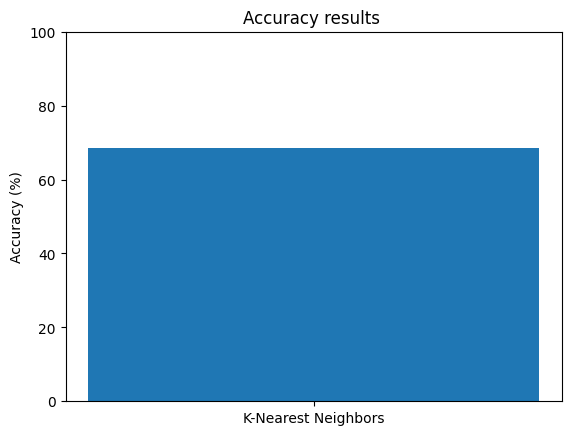

In [25]:
# Visualize results (example)
plt.bar(['K-Nearest Neighbors'], [acc_score])
plt.ylim([0, 100])
plt.ylabel('Accuracy (%)')
plt.title('Accuracy results ')
plt.show()

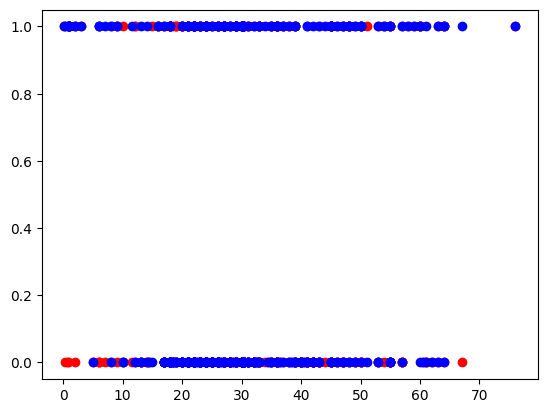

In [26]:
# Scatter plot for y_test
plt.scatter(test['Age'], y_test, color='r', label='Actual')
# Scatter plot for y_pred
plt.scatter(test['Age'], y_pred, color='b', label='Predicted')